<a href="https://colab.research.google.com/github/beyzahiz/Film-Yorumu-Duygu-Analizi/blob/main/Film_Yorumu_Duygu_Analizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews
import random

documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

random.shuffle(documents)

# Yorumları ve etiketleri ayır
texts = [" ".join(words) for words, label in documents]
labels = [1 if label == 'pos' else 0 for words, label in documents]

df = pd.DataFrame({'yorum': texts, 'etiket': labels})
df.head()


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


,yorum,etiket
0,"after having heard so many critics describe "" ...",1
1,some movies ask you to leave your brain at the...,0
2,written by mark rosenthal and lawrence konner ...,1
3,"seen august 8 , 1998 at 6 p . m . at rotterdam...",1
4,field of dreams almost defies description . al...,1


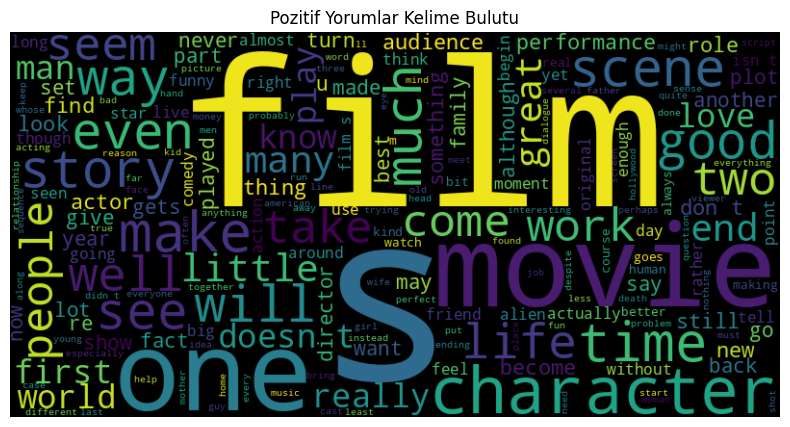

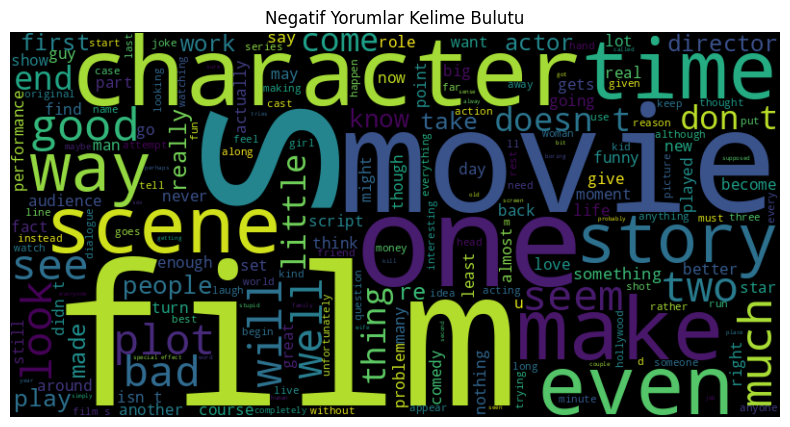

In [ ]:
# Pozitif yorumlar için wordcloud
pozitif = " ".join(df[df['etiket'] == 1]['yorum'])
wordcloud = WordCloud(width=800, height=400).generate(pozitif)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Pozitif Yorumlar Kelime Bulutu")
plt.axis('off')
plt.show()

# Negatif yorumlar için wordcloud
negatif = " ".join(df[df['etiket'] == 0]['yorum'])
wordcloud = WordCloud(width=800, height=400).generate(negatif)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Negatif Yorumlar Kelime Bulutu")
plt.axis('off')
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['yorum'], df['etiket'], test_size=0.2, random_state=42)

# TF-IDF vektörleştirici
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
lr = LogisticRegression()
lr.fit(X_train_vec, y_train)
y_pred_lr = lr.predict(X_test_vec)
print("Lojistik Regresyon Doğruluk:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Lojistik Regresyon Doğruluk: 0.86
[[174  25]
 [ 31 170]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       199
           1       0.87      0.85      0.86       201

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



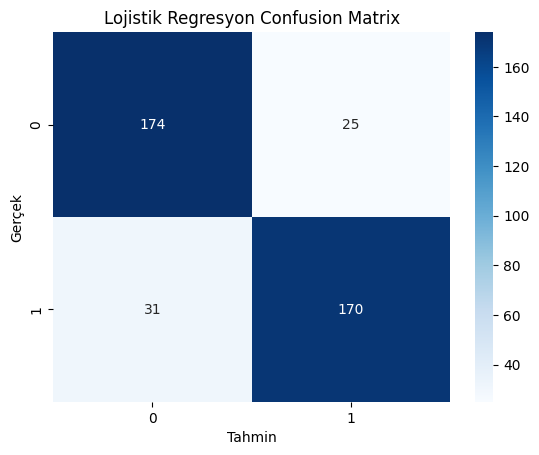

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues")
plt.title("Lojistik Regresyon Confusion Matrix")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.show()

In [ ]:
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)
y_pred_nb = nb.predict(X_test_vec)
print("Naive Bayes Doğruluk:", accuracy_score(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Doğruluk: 0.8475
[[174  25]
 [ 36 165]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       199
           1       0.87      0.82      0.84       201

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



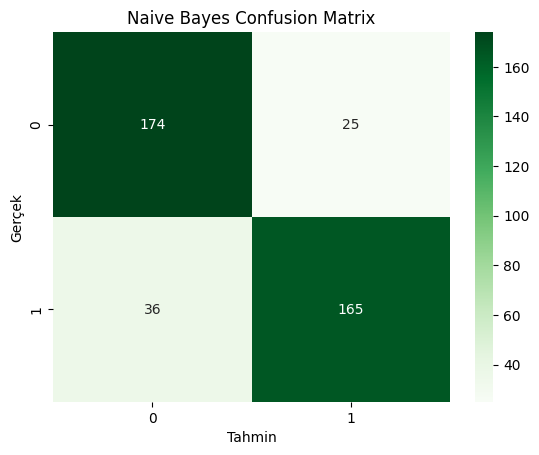

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt="d", cmap="Greens")
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.show()

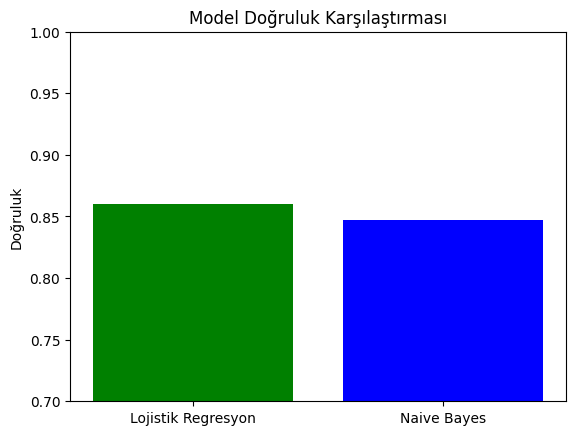

In [ ]:
scores = {
    "Lojistik Regresyon": accuracy_score(y_test, y_pred_lr),
    "Naive Bayes": accuracy_score(y_test, y_pred_nb)
}

plt.bar(scores.keys(), scores.values(), color=["green", "blue"])
plt.title("Model Doğruluk Karşılaştırması")
plt.ylim(0.7, 1.0)
plt.ylabel("Doğruluk")
plt.show()


In [ ]:
def yorum_tahmin_et(yorum):
    yorum_vec = vectorizer.transform([yorum])
    tahmin_lr = lr.predict(yorum_vec)[0]
    tahmin_nb = nb.predict(yorum_vec)[0]

    print("Yeni Yorum:", yorum)
    print("Lojistik Regresyon Tahmini:", "Pozitif" if tahmin_lr == 1 else "Negatif")
    print("Naive Bayes Tahmini:", "Pozitif" if tahmin_nb == 1 else "Negatif")
    print("-" * 50)

# Test yorumları
yorum_tahmin_et("This movie was fantastic! I loved it.")
yorum_tahmin_et("It was the worst film I have ever seen.")


Yeni Yorum: This movie was fantastic! I loved it.
Lojistik Regresyon Tahmini: Pozitif
Naive Bayes Tahmini: Pozitif
--------------------------------------------------
Yeni Yorum: It was the worst film I have ever seen.
Lojistik Regresyon Tahmini: Negatif
Naive Bayes Tahmini: Negatif
--------------------------------------------------
